In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipyleaflet import Map, Marker, AwesomeIcon
from IPython.display import clear_output

In [2]:
from _init import *
from recommendation_test import *

In [3]:
data_set = Dataset()
cleaning= Data_cleaning()
rambling = Data_rambling()
general_info= General_data()

In [4]:
df=data_set.df_set(preprocess=True)
df.columns
general_info.df = df
rm = rest_models(df, "", False)

### Wykres Box Plot zmiennych względem województw

In [5]:
@widgets.interact_manual(x=["apartment_room_number", "apartment_floor", "building_year", "price", "area_total"])
def plot(x="apartment_room_number"):
    general_info.box_plot(df, x)

interactive(children=(Dropdown(description='x', options=('apartment_room_number', 'apartment_floor', 'building…

### Wykres Box Plot każdej zmiennej

In [6]:
@widgets.interact_manual(x=["apartment_room_number", "apartment_floor", "building_year", "price", "area_total"])
def plot(x="apartment_room_number"):
    general_info.single_box_plot(df, x)

interactive(children=(Dropdown(description='x', options=('apartment_room_number', 'apartment_floor', 'building…

### Histogram każdej zmiennej

In [7]:
@widgets.interact_manual(x=["apartment_room_number", "apartment_floor", "building_year", "price", "area_total"])
def plot(x="apartment_room_number"):
    general_info.hists(df, x)

interactive(children=(Dropdown(description='x', options=('apartment_room_number', 'apartment_floor', 'building…

### Ważność zmiennych wykreślanych przy pomocy obiektu XGBoost

[19:32:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


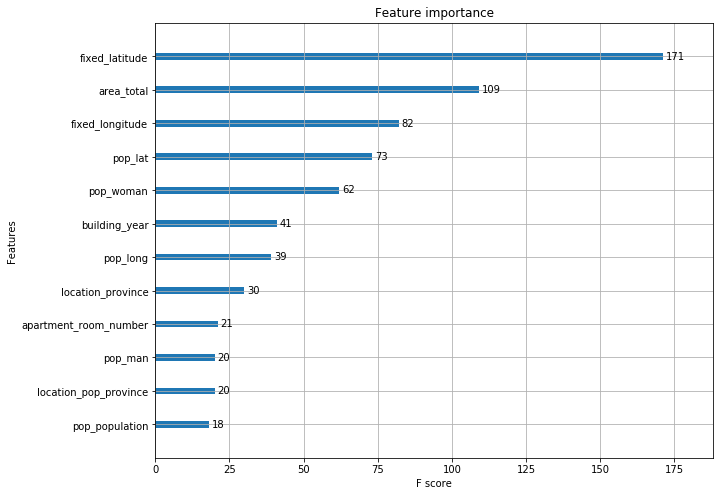

In [8]:
general_info.feature_importants(df)

### Aplikacja

In [9]:
center = (52.0, 20.0)
estate = AwesomeIcon(name='home',marker_color='red',icon_color='white',spin=False)
m = Map(center=center, zoom=5)
marker = Marker(icon=estate, location=center, draggable=True)
m.add_layer(marker);
display(m)

Map(center=[52.0, 20.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [10]:
building_w = widgets.IntSlider(value=2000,min=1930,max=2021,step=1,description='Rok budowy:',disabled=False,continuous_update=False,orientation='horizontal',readout=True)
display(building_w)

IntSlider(value=2000, continuous_update=False, description='Rok budowy:', max=2021, min=1930)

In [11]:
area_total_w = widgets.BoundedFloatText(value=10.0, max=500.0, description='Powierzchnia:', disabled=False)
display(area_total_w)

BoundedFloatText(value=10.0, description='Powierzchnia:', max=500.0)

In [12]:
apartment_room_number_w = widgets.IntSlider(value=1,min=1,max=10,step=1, description='Liczba pokoi:',disabled=False,continuous_update=False,orientation='horizontal',readout=True)
display(apartment_room_number_w)

IntSlider(value=1, continuous_update=False, description='Liczba pokoi:', max=10, min=1)

In [13]:
apartment_floor_w = widgets.IntSlider(value=0,min=0,max=25,step=1,description='Piętro:',disabled=False,continuous_update=False,orientation='horizontal',readout=True)
display(apartment_floor_w)

IntSlider(value=0, continuous_update=False, description='Piętro:', max=25)

In [16]:
model_w = widgets.Button(description='Sprawdź cenę',disabled=False,button_style='success')
output = widgets.Output()

display(model_w, output)

def on_button_clicked(b):
    with output:
        try:
            apartment_floor = apartment_floor_w.value
            apartment_room_number = apartment_room_number_w.value
            area_total = area_total_w.value
            building_year = building_w.value 
            lat = marker.location[0] 
            long = marker.location[1]
            x_user = pd.DataFrame.from_dict({
                "fixed_latitude": [lat],
                "fixed_longitude": [long], 
                "building_year": [building_year],
                "area_total": [area_total], 
                "apartment_room_number": [apartment_room_number], 
                "apartment_floor": [apartment_floor]
            })
            models = rm.load_model("regression", load_type="joblib", return_type="dict")
            for k, m in models.items():
                y_pred = m.predict(x_user)
                print(f"przewidziana cena: {y_pred} dla modelu {k}")
        except Exception as e:
            print(e)
model_w.on_click(on_button_clicked)

Button(button_style='success', description='Sprawdź cenę', style=ButtonStyle())

Output()

### System rekomendacyjny

In [15]:
run_knn()

(22814, 7)
Wycena mieszkania na podstawie mieszkań podobnych:
1. Wg cena całkowitych mieszkań podobnych
 - cena średnia: 337799.8
 - cena minimalna:  190000.0
 - cena maksymalna:  550000.0
2. Wg cen za m2 mieszkań podobnych
 - średnia cena za m2: 2712.26
 - cena minimalna za m2:  270.6
 - cena maksymalna za m2:  5527.6
3. Wycena mieszkania testowego na podstawie średniej ceny mieszkań podobnych:  2416836.5
4. testowa oferta
price                    950000.000000
area_total                 1702.000000
building_year              1993.466667
fixed_latitude               51.078552
fixed_longitude              17.053194
apartment_room_number         0.000000
apartment_floor               0.000000
location_province            10.000000
Name: 22695, dtype: float64


,price,area_total,price_permeter,apartment_room_number,apartment_floor,building_year
0,399000.0,106.9,3733.2,0.0,0.0,2019.0
1,250000.0,923.9,270.6,0.0,0.0,1979.0
2,190000.0,52.0,3653.8,0.0,0.0,1974.0
3,299999.0,797.6,376.1,0.0,0.0,2020.0
4,550000.0,99.5,5527.6,0.0,0.0,2596.0
